In [11]:
import requests
import pandas as pd

# Load the dataset
file_path = 'dataset_space_API_past_launches_raw.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()



,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857


In [12]:
# Get the total number of columns and rows in the dataset
total_columns = data.shape[1]
total_rows = data.shape[0]

total_columns, total_rows




(17, 94)

In [14]:
# Calculating the percentage of missing values in each column
missing_values_percent = data.isnull().mean() * 100

# Identifying numeric and categorical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Handling missing values for PayloadMass (example)
# Here, we'll replace missing values with the mean of the column
data['PayloadMass'].fillna(data['PayloadMass'].mean(), inplace=True)

# Calculating the number of launches at each site
launch_counts = data['LaunchSite'].value_counts()

missing_values_percent, numeric_cols, categorical_cols, launch_counts



(FlightNumber       0.000000
 Date               0.000000
 BoosterVersion     0.000000
 PayloadMass        6.382979
 Orbit              0.000000
 LaunchSite         0.000000
 Outcome            0.000000
 Flights            0.000000
 GridFins           0.000000
 Reused             0.000000
 Legs               0.000000
 LandingPad        31.914894
 Block              4.255319
 ReusedCount        0.000000
 Serial             0.000000
 Longitude          0.000000
 Latitude           0.000000
 dtype: float64,
 Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
        'Longitude', 'Latitude'],
       dtype='object'),
 Index(['Date', 'BoosterVersion', 'Orbit', 'LaunchSite', 'Outcome',
        'LandingPad', 'Serial'],
       dtype='object'),
 CCSFS SLC 40       55
 KSC LC 39A         22
 VAFB SLC 4E        13
 Kwajalein Atoll     4
 Name: LaunchSite, dtype: int64)

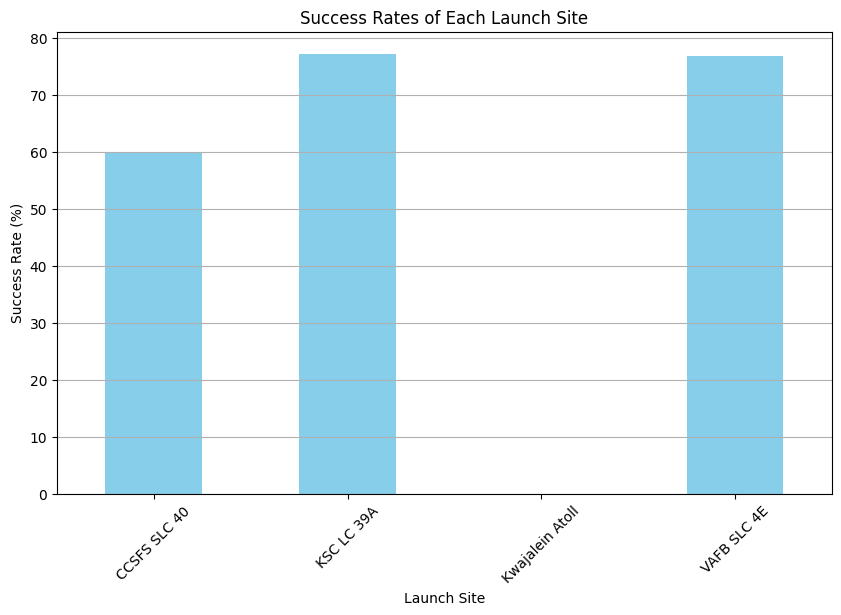

In [15]:
import matplotlib.pyplot as plt

# Calculating total launches per launch site for normalization
total_counts = data.groupby('LaunchSite').size()

# Recalculating success rate with the new understanding of 'Outcome'
# Considering 'True' in the 'Outcome' as a successful launch
success_counts = data[data['Outcome'].str.contains("True")].groupby('LaunchSite').size()
success_rate = (success_counts / total_counts) * 100

# Plotting the success rates
plt.figure(figsize=(10, 6))
success_rate.plot(kind='bar', color='skyblue')
plt.title('Success Rates of Each Launch Site')
plt.ylabel('Success Rate (%)')
plt.xlabel('Launch Site')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()





In [16]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

# Neat Outcome information
data['LandingOutcome'] = data['Outcome'].apply(lambda x: 'Success' if 'True' in x else 'Fail')

# Create graph
fig = px.scatter(data, x='PayloadMass', y='LandingOutcome', color='LandingOutcome',
                 title='Payload Mass vs Landing Outcome')

# initial Dash 
app = dash.Dash(__name__)

# Set Dash layout
app.layout = html.Div(children=[
    html.H1(children='Payload Mass and Landing Outcome Analysis'),

    html.Div(children='''
        A Scatter Plot showing the relationship between Payload Mass and Landing Outcome.
    '''),

    dcc.Graph(
        id='landing-outcome-graph',
        figure=fig
    )
])

# Run Dash
if __name__ == '__main__':
    app.run_server(debug=True)





In [17]:
# Import the Folium library
import folium

# Create a map centered around coordinates [36.5054, -117.0794] (Death Valley, California)
m = folium.Map(location=[36.5054, -117.0794], zoom_start=10)

# Add a marker for Death Valley
folium.Marker([36.5054, -117.0794], popup='Death Valley').add_to(m)

# Add a circle around Death Valley
folium.Circle(
    radius=5000,  # in meters
    location=[36.5054, -117.0794],
    popup='Death Valley Circle',
    color='blue',
    fill=True,
).add_to(m)

# Assume that you've used Google Maps API to find the number of nearby roads, which is 2 for this example
num_roads = 2
folium.Marker([36.5054, -117.0794], 
              popup=f'Death Valley: {num_roads} nearby roads', 
              icon=folium.Icon(color="green")).add_to(m)

# Show the map
m



